<a href="https://colab.research.google.com/github/tohnperfect/AIprototype2022/blob/main/Tensorflow_(network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sequential (ง่าย แต่สร้างได้แต่แบบไม่ซับซ้อน (วิ่งเป็นเส้นตรง))
2. Functional (ยากขึ้นมาอีกนิด แต่สามารถปรับเส้นทางให้มีความซับซ้อนได้)

~~3. Subclassing~~ (ยากสุด แต่สามารถแก้ไขได้ตามที่เราต้องการ)

# Sequential

### Import

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Define

In [2]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="output")
    ]
)

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


### Train (รวมกับการนำเข้าข้อมูลใน colab notebook หน้า)

### Predict

In [4]:
# Call model on a test input
x = tf.ones((5, 4))
y = model(x)

In [5]:
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [6]:
y

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[-0.20132957, -0.46151027,  0.402304  , -0.01053117],
       [-0.20132957, -0.46151027,  0.402304  , -0.01053117],
       [-0.20132957, -0.46151027,  0.402304  , -0.01053117],
       [-0.20132957, -0.46151027,  0.402304  , -0.01053117],
       [-0.20132957, -0.46151027,  0.402304  , -0.01053117]],
      dtype=float32)>

## สร้าง sequential แบบที่สอง

In [7]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(4))

In [8]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


## ปรับเปลี่ยน Network

In [9]:
model2.pop()


In [10]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [11]:
model2.add(layers.Dense(6))

In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [13]:
x = tf.ones((5, 4))
y = model2(x)
y

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[-0.00877949, -0.01365716,  0.00360425,  0.00914343,  0.00743575,
         0.00510325],
       [-0.00877949, -0.01365716,  0.00360425,  0.00914343,  0.00743575,
         0.00510325],
       [-0.00877949, -0.01365716,  0.00360425,  0.00914343,  0.00743575,
         0.00510325],
       [-0.00877949, -0.01365716,  0.00360425,  0.00914343,  0.00743575,
         0.00510325],
       [-0.00877949, -0.01365716,  0.00360425,  0.00914343,  0.00743575,
         0.00510325]], dtype=float32)>

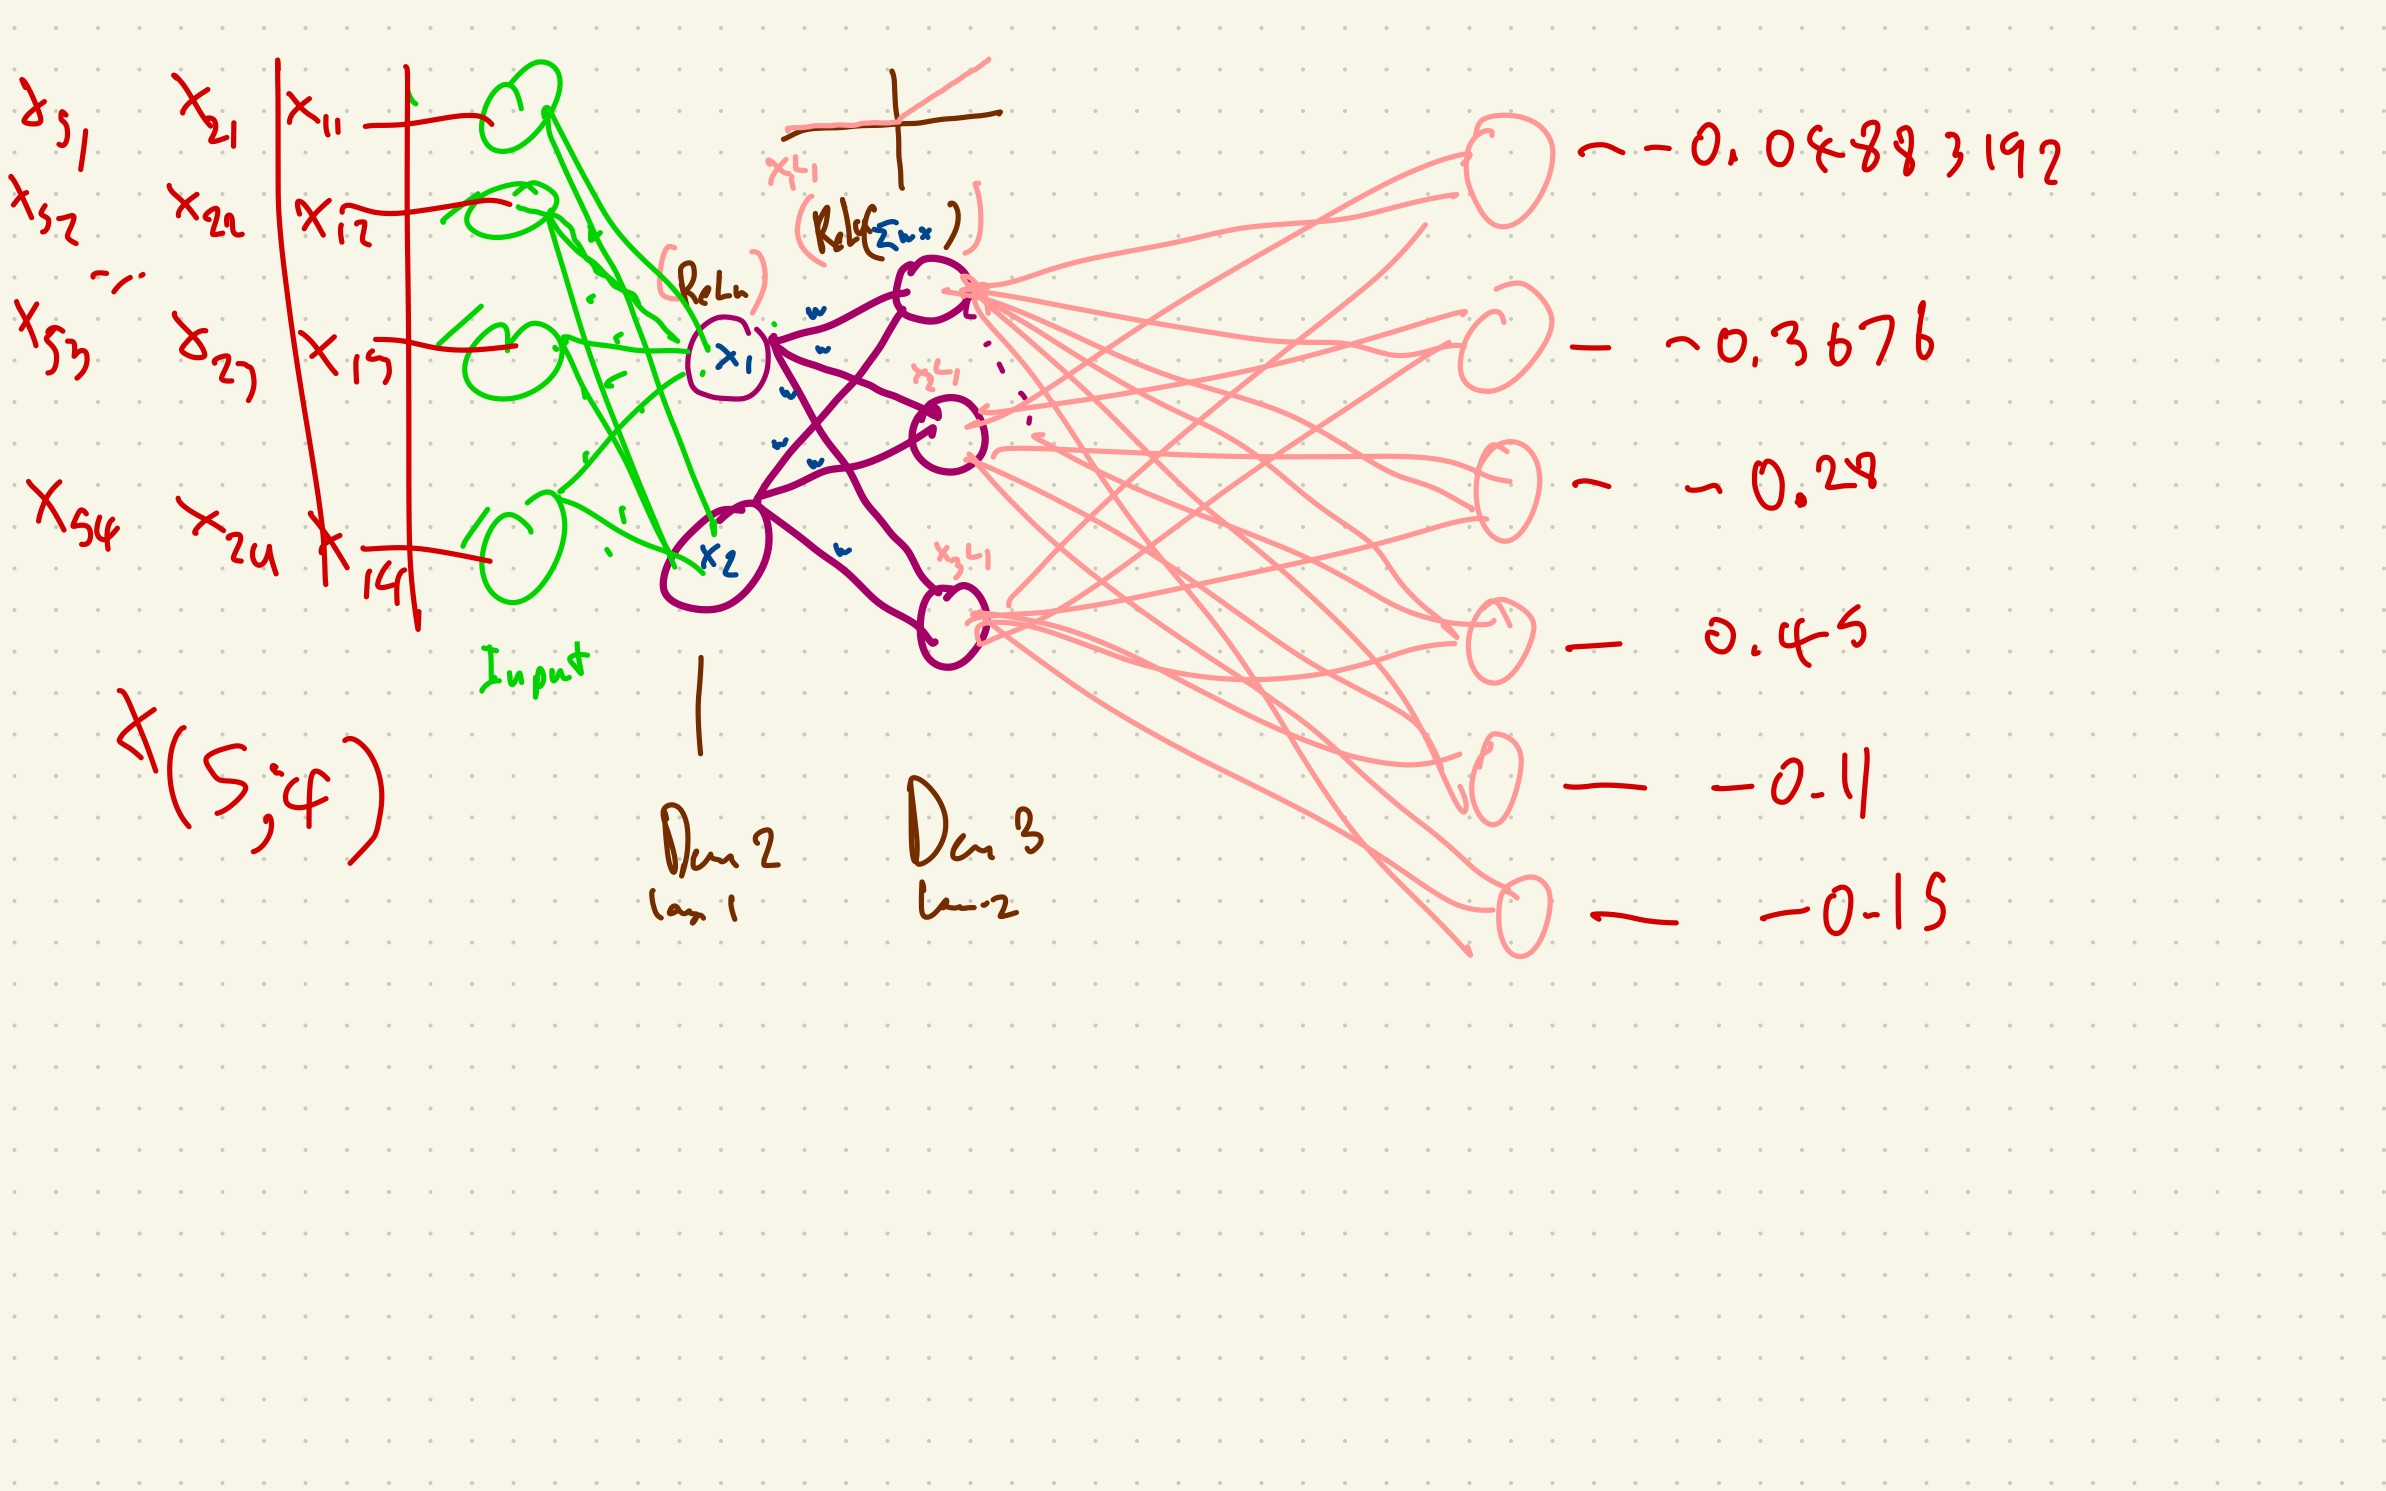

# ลองเทรน Sequential model ที่สร้างขึ้นเอง

In [14]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## load data

In [15]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


### แปลงค่าเป็น 0-1 เพื่อนำเข้า network

In [16]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### plot รูปตัวอย่าง

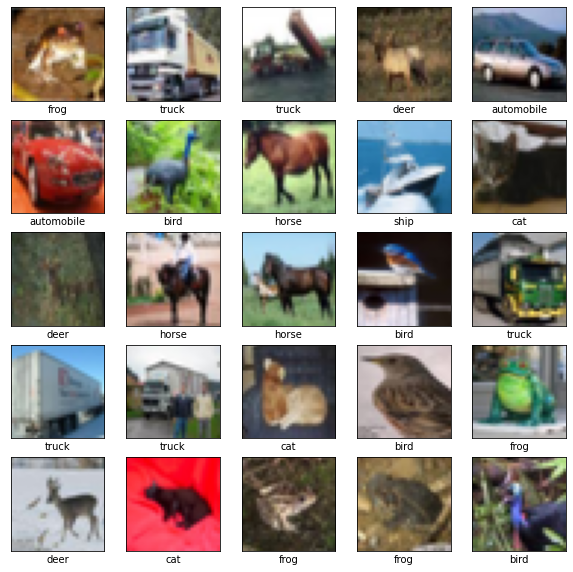

In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Define

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

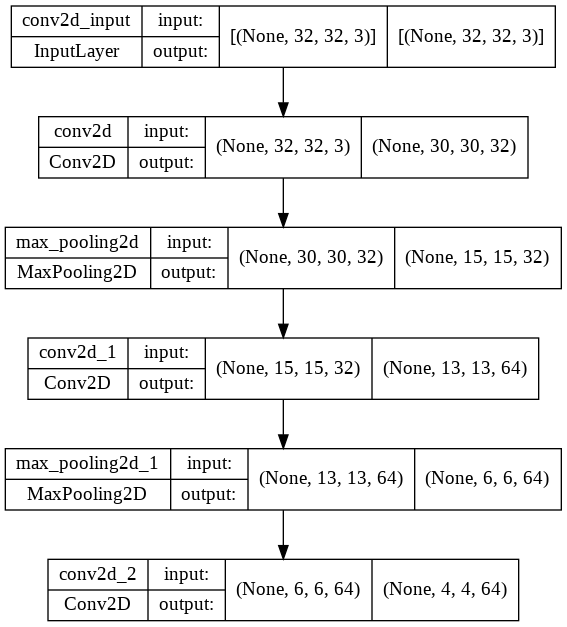

In [20]:
keras.utils.plot_model(model,show_shapes=True)

### ต่อด้วย flatten และ dense เพื่อทำนาย

In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

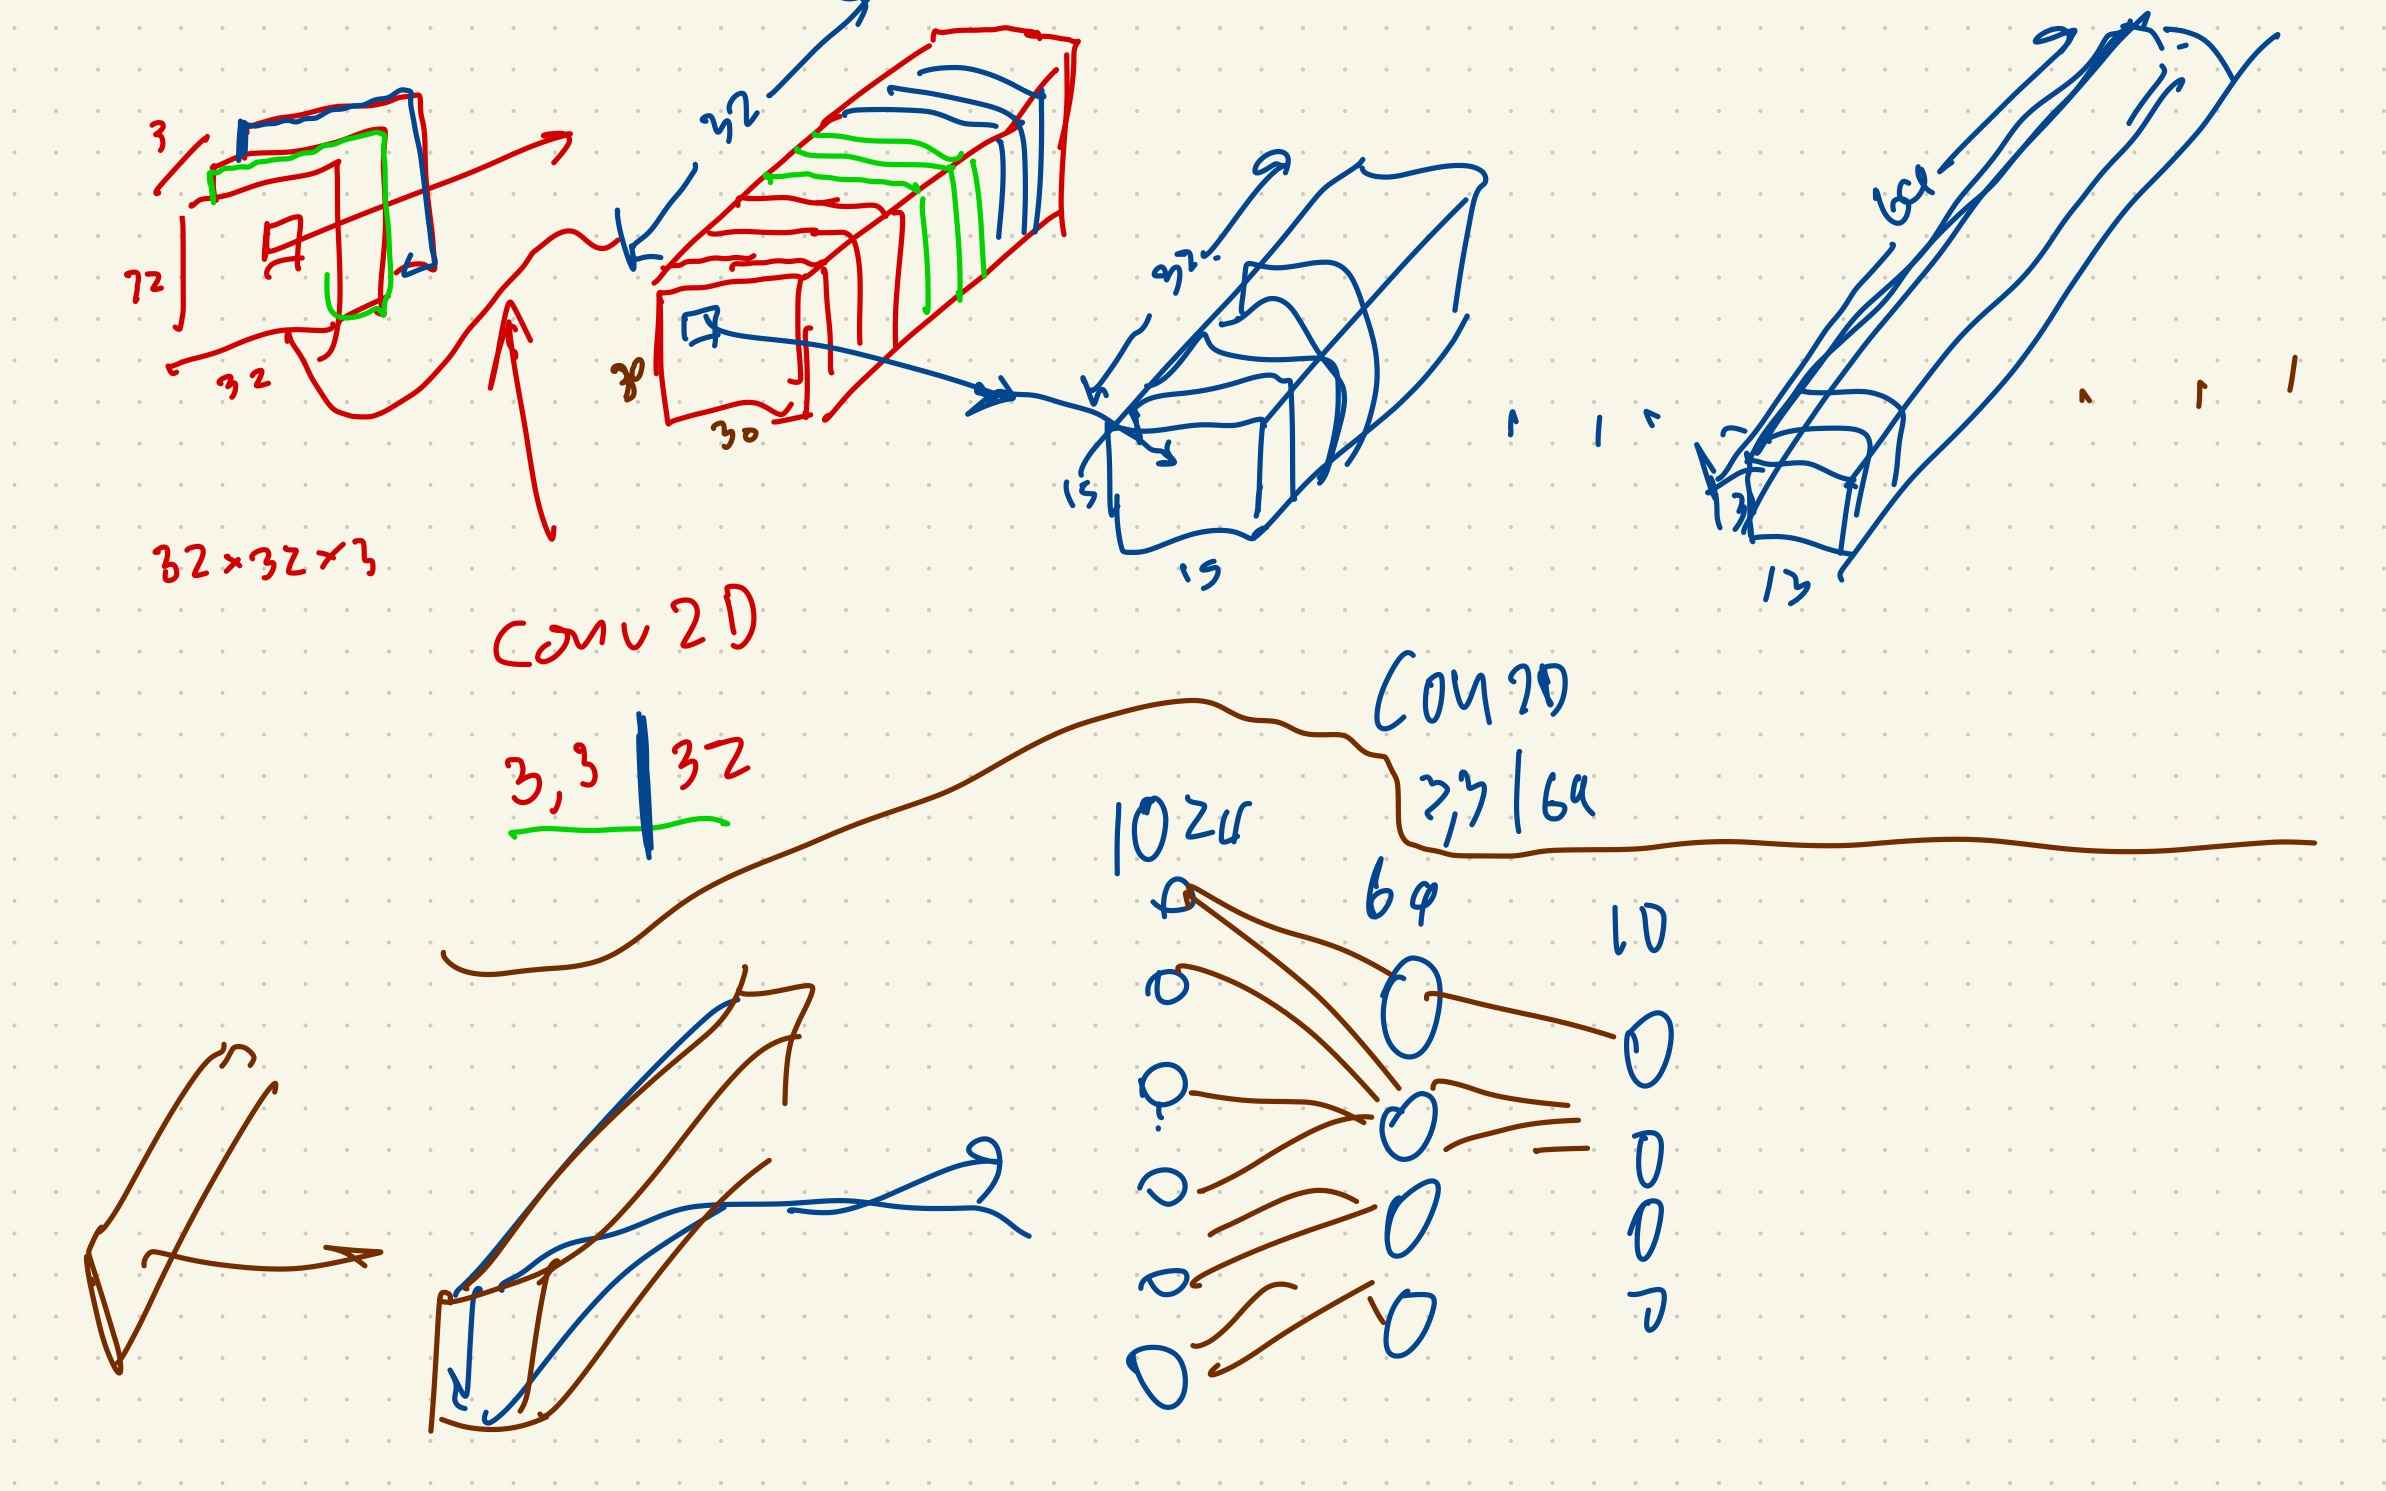

### Define training parameters

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train

In [24]:
history = model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 17s 5ms/step - loss: 1.5109 - accuracy: 0.4463 - val_loss: 1.2095 - val_accuracy: 0.5618
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1232 - accuracy: 0.6057 - val_loss: 1.0369 - val_accuracy: 0.6304


### Test

313/313 - 1s - loss: 1.0369 - accuracy: 0.6304 - 716ms/epoch - 2ms/step


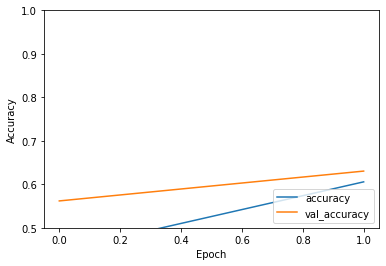

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [26]:
print(test_acc)

0.6304000020027161


## Functional

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
input_images = keras.Input(shape=(32, 32, 3), name="img")
model = layers.Conv2D(32, (3, 3), activation="relu", name="conv1")(input_images) # (input_images) input จาก layer ก่อนหน้า 
model = layers.MaxPooling2D((2, 2), name="maxpool1")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2, 2), name="maxpool2")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv3")(model)
model = layers.Flatten(name="Flatten")(model)
model = layers.Dense(64, activation='relu', name="activation")(model)
output = layers.Dense(10, name="output")(model)

In [29]:
my_model = keras.Model(input_images, output, name = "mymodel")

In [30]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 Flatten (Flatten)           (None, 1024)              0   

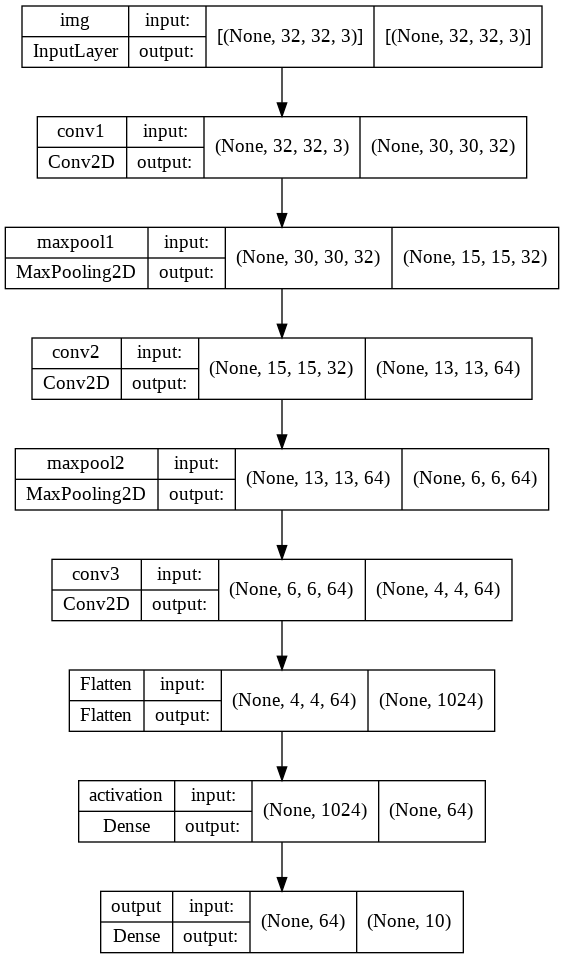

In [31]:
keras.utils.plot_model(my_model, show_shapes=True)

In [32]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
history = my_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5023 - accuracy: 0.4528 - val_loss: 1.2768 - val_accuracy: 0.5477
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1352 - accuracy: 0.5977 - val_loss: 1.0644 - val_accuracy: 0.6242
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9839 - accuracy: 0.6561 - val_loss: 0.9722 - val_accuracy: 0.6575
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8870 - accuracy: 0.6881 - val_loss: 0.9509 - val_accuracy: 0.6718
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8193 - accuracy: 0.7141 - val_loss: 0.8750 - val_accuracy: 0.6925
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7620 - accuracy: 0.7327 - val_loss: 0.8967 - val_accuracy: 0.6943
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7069 - accuracy: 0.7498 - val_loss: 0.8657 - val_accuracy:

313/313 - 1s - loss: 0.8685 - accuracy: 0.7192 - 699ms/epoch - 2ms/step


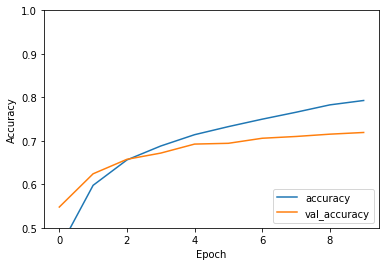

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [35]:
print(test_acc)

0.7192000150680542


### ResNet

In [36]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_4 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_3[0][0]']               
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_4[0][0]']               
                                                                                         

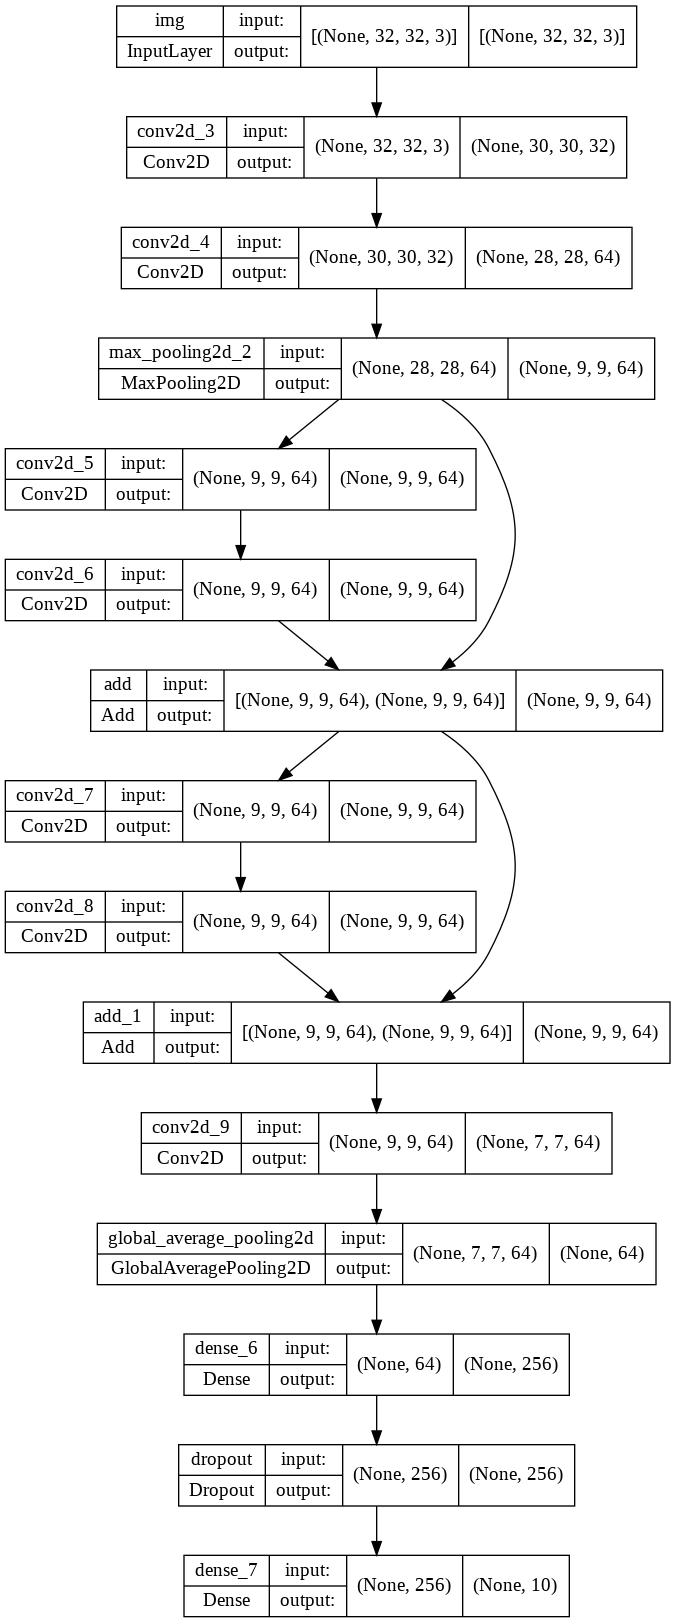

In [37]:
keras.utils.plot_model(resnet_model,  show_shapes=True)

In [38]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
history = resnet_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6911 - accuracy: 0.7587 - val_loss: 0.7584 - val_accuracy: 0.7445
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6399 - accuracy: 0.7804 - val_loss: 0.7596 - val_accuracy: 0.7391
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5973 - accuracy: 0.7934 - val_loss: 0.6874 - val_accuracy: 0.7642
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5507 - accuracy: 0.8092 - val_loss: 0.6798 - val_accuracy: 0.7774
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5114 - accuracy: 0.8238 - val_loss: 0.6794 - val_accuracy: 0.7766
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4784 - accuracy: 0.8349 - val_loss: 0.6963 - val_accuracy: 0.7723
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4510 - accuracy: 0.8434 - val_loss: 0.7272 - val_ac

313/313 - 1s - loss: 0.8685 - accuracy: 0.7192 - 713ms/epoch - 2ms/step


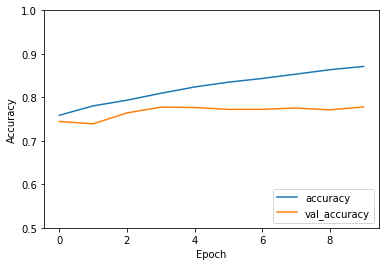

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [42]:
print(test_acc)

0.7192000150680542


# Tensorflow Data Pipeline

flow from directory

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
path2data = '/content/drive/MyDrive/Classification Dataset'

In [64]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2)(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 198, 198, 32  896         ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 conv2d_25 (Conv2D)             (None, 196, 196, 64  18496       ['conv2d_24[0][0]']              
                                )                                                   

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=4,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [56]:
from tensorflow.keras import optimizers

In [66]:
resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [67]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch= 7,
      epochs=50,
      verbose=1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


7/7 [==============================] - 2s 145ms/step - loss: 2.0973 - accuracy: 0.6538
Epoch 2/50
7/7 [==============================] - 1s 77ms/step - loss: 0.7937 - accuracy: 0.5769
Epoch 3/50
7/7 [==============================] - 1s 78ms/step - loss: 0.8172 - accuracy: 0.6154
Epoch 4/50
7/7 [==============================] - 1s 81ms/step - loss: 0.6644 - accuracy: 0.4615
Epoch 5/50
7/7 [==============================] - 1s 62ms/step - loss: 0.6688 - accuracy: 0.3846
Epoch 6/50
7/7 [==============================] - 1s 78ms/step - loss: 0.7724 - accuracy: 0.7308
Epoch 7/50
7/7 [==============================] - 1s 74ms/step - loss: 0.7241 - accuracy: 0.6538
Epoch 8/50
7/7 [==============================] - 1s 81ms/step - loss: 0.7332 - accuracy: 0.6154
Epoch 9/50
7/7 [==============================] - 1s 89ms/step - loss: 0.6832 - accuracy: 0.3846
Epoch 10/50
7/7 [==============================] - 1s 78ms/step - loss: 0.7280 - accuracy: 0.5769
Epoch 11/50
7/7 [======================